### Salary Data Prediction Using SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_test=pd.read_csv("SalaryData_Test(1).csv")

In [3]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
df_test.shape

(15060, 14)

In [5]:
df_train=pd.read_csv("SalaryData_Train(1).csv")

In [6]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_train.shape

(30161, 14)

In [8]:
df=pd.concat([df_train,df_test],ignore_index=True)

In [9]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.shape

(45221, 14)

In [11]:
df.duplicated().sum()

5982

In [12]:
df=df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

<AxesSubplot:>

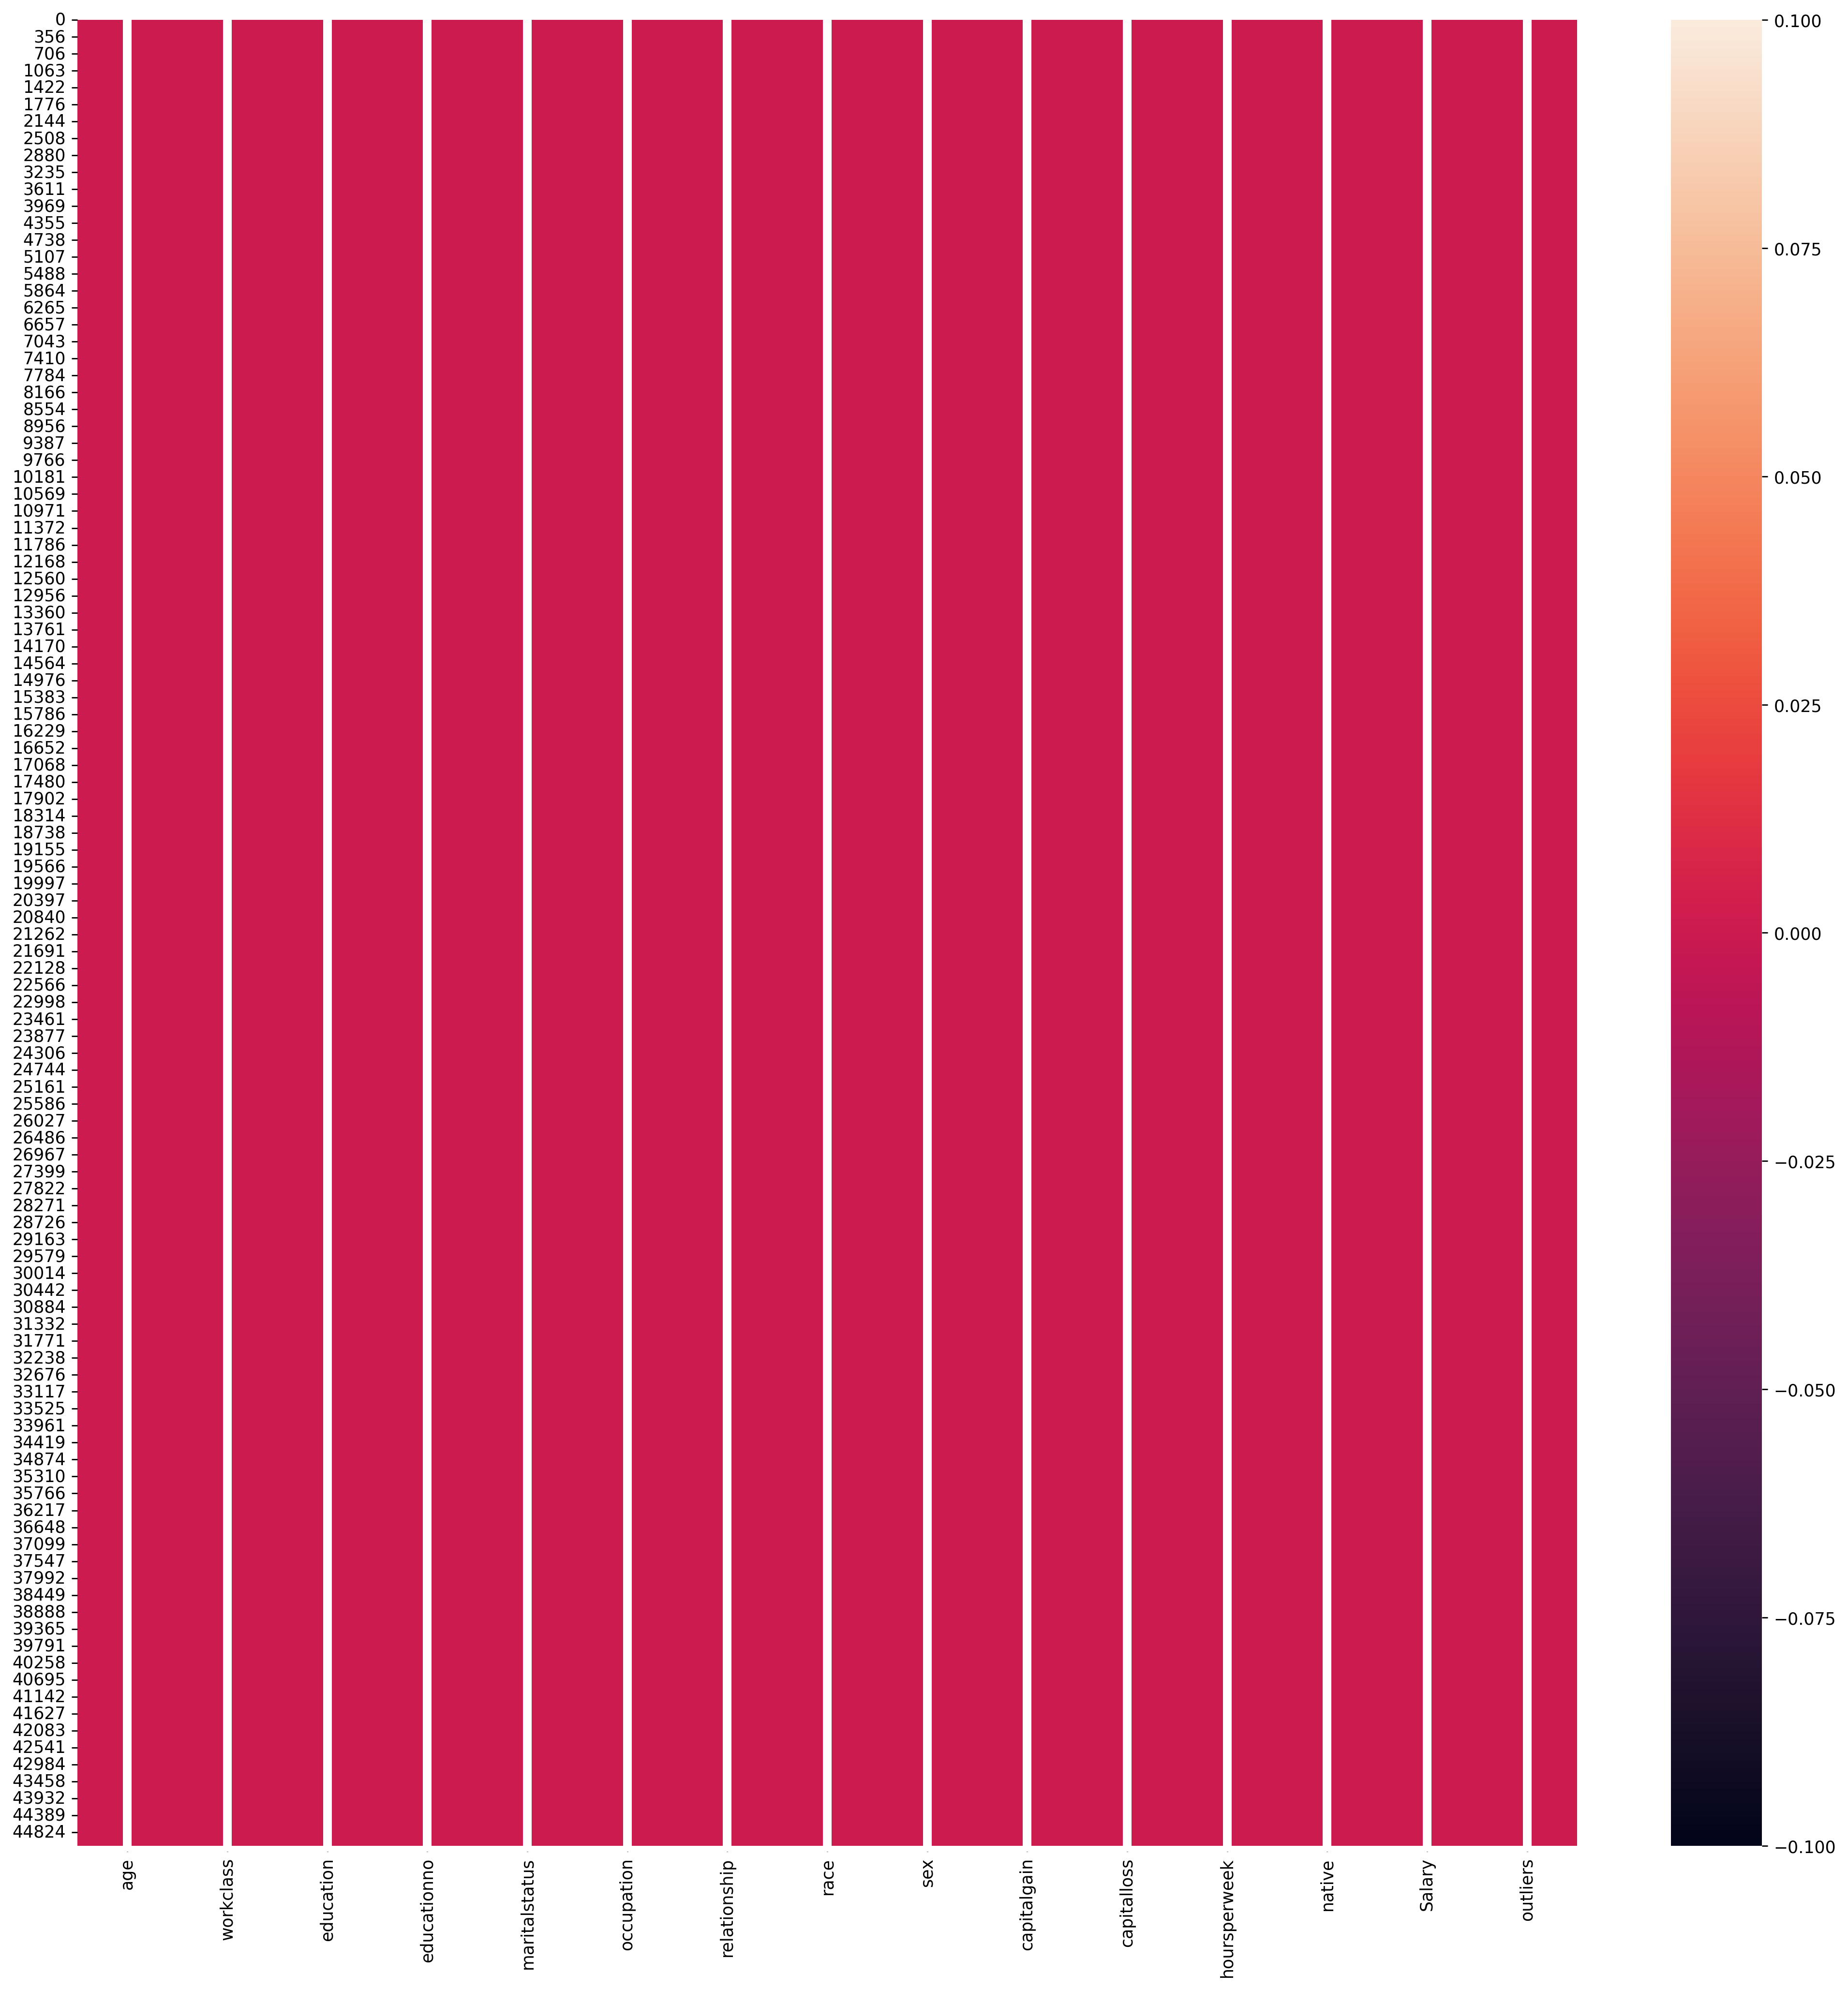

In [54]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250
sns.heatmap(df.isnull(),annot=True)

In [15]:
#Checking CoRelation  Pearson
df.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.030211,0.075495,0.049876,0.066927
educationno,0.030211,1.000000,0.129552,0.082594,0.136030
capitalgain,0.075495,0.129552,1.000000,-0.036791,0.082977
capitalloss,0.049876,0.082594,-0.036791,1.000000,0.050638
hoursperweek,0.066927,0.136030,0.082977,0.050638,1.000000


<AxesSubplot:>

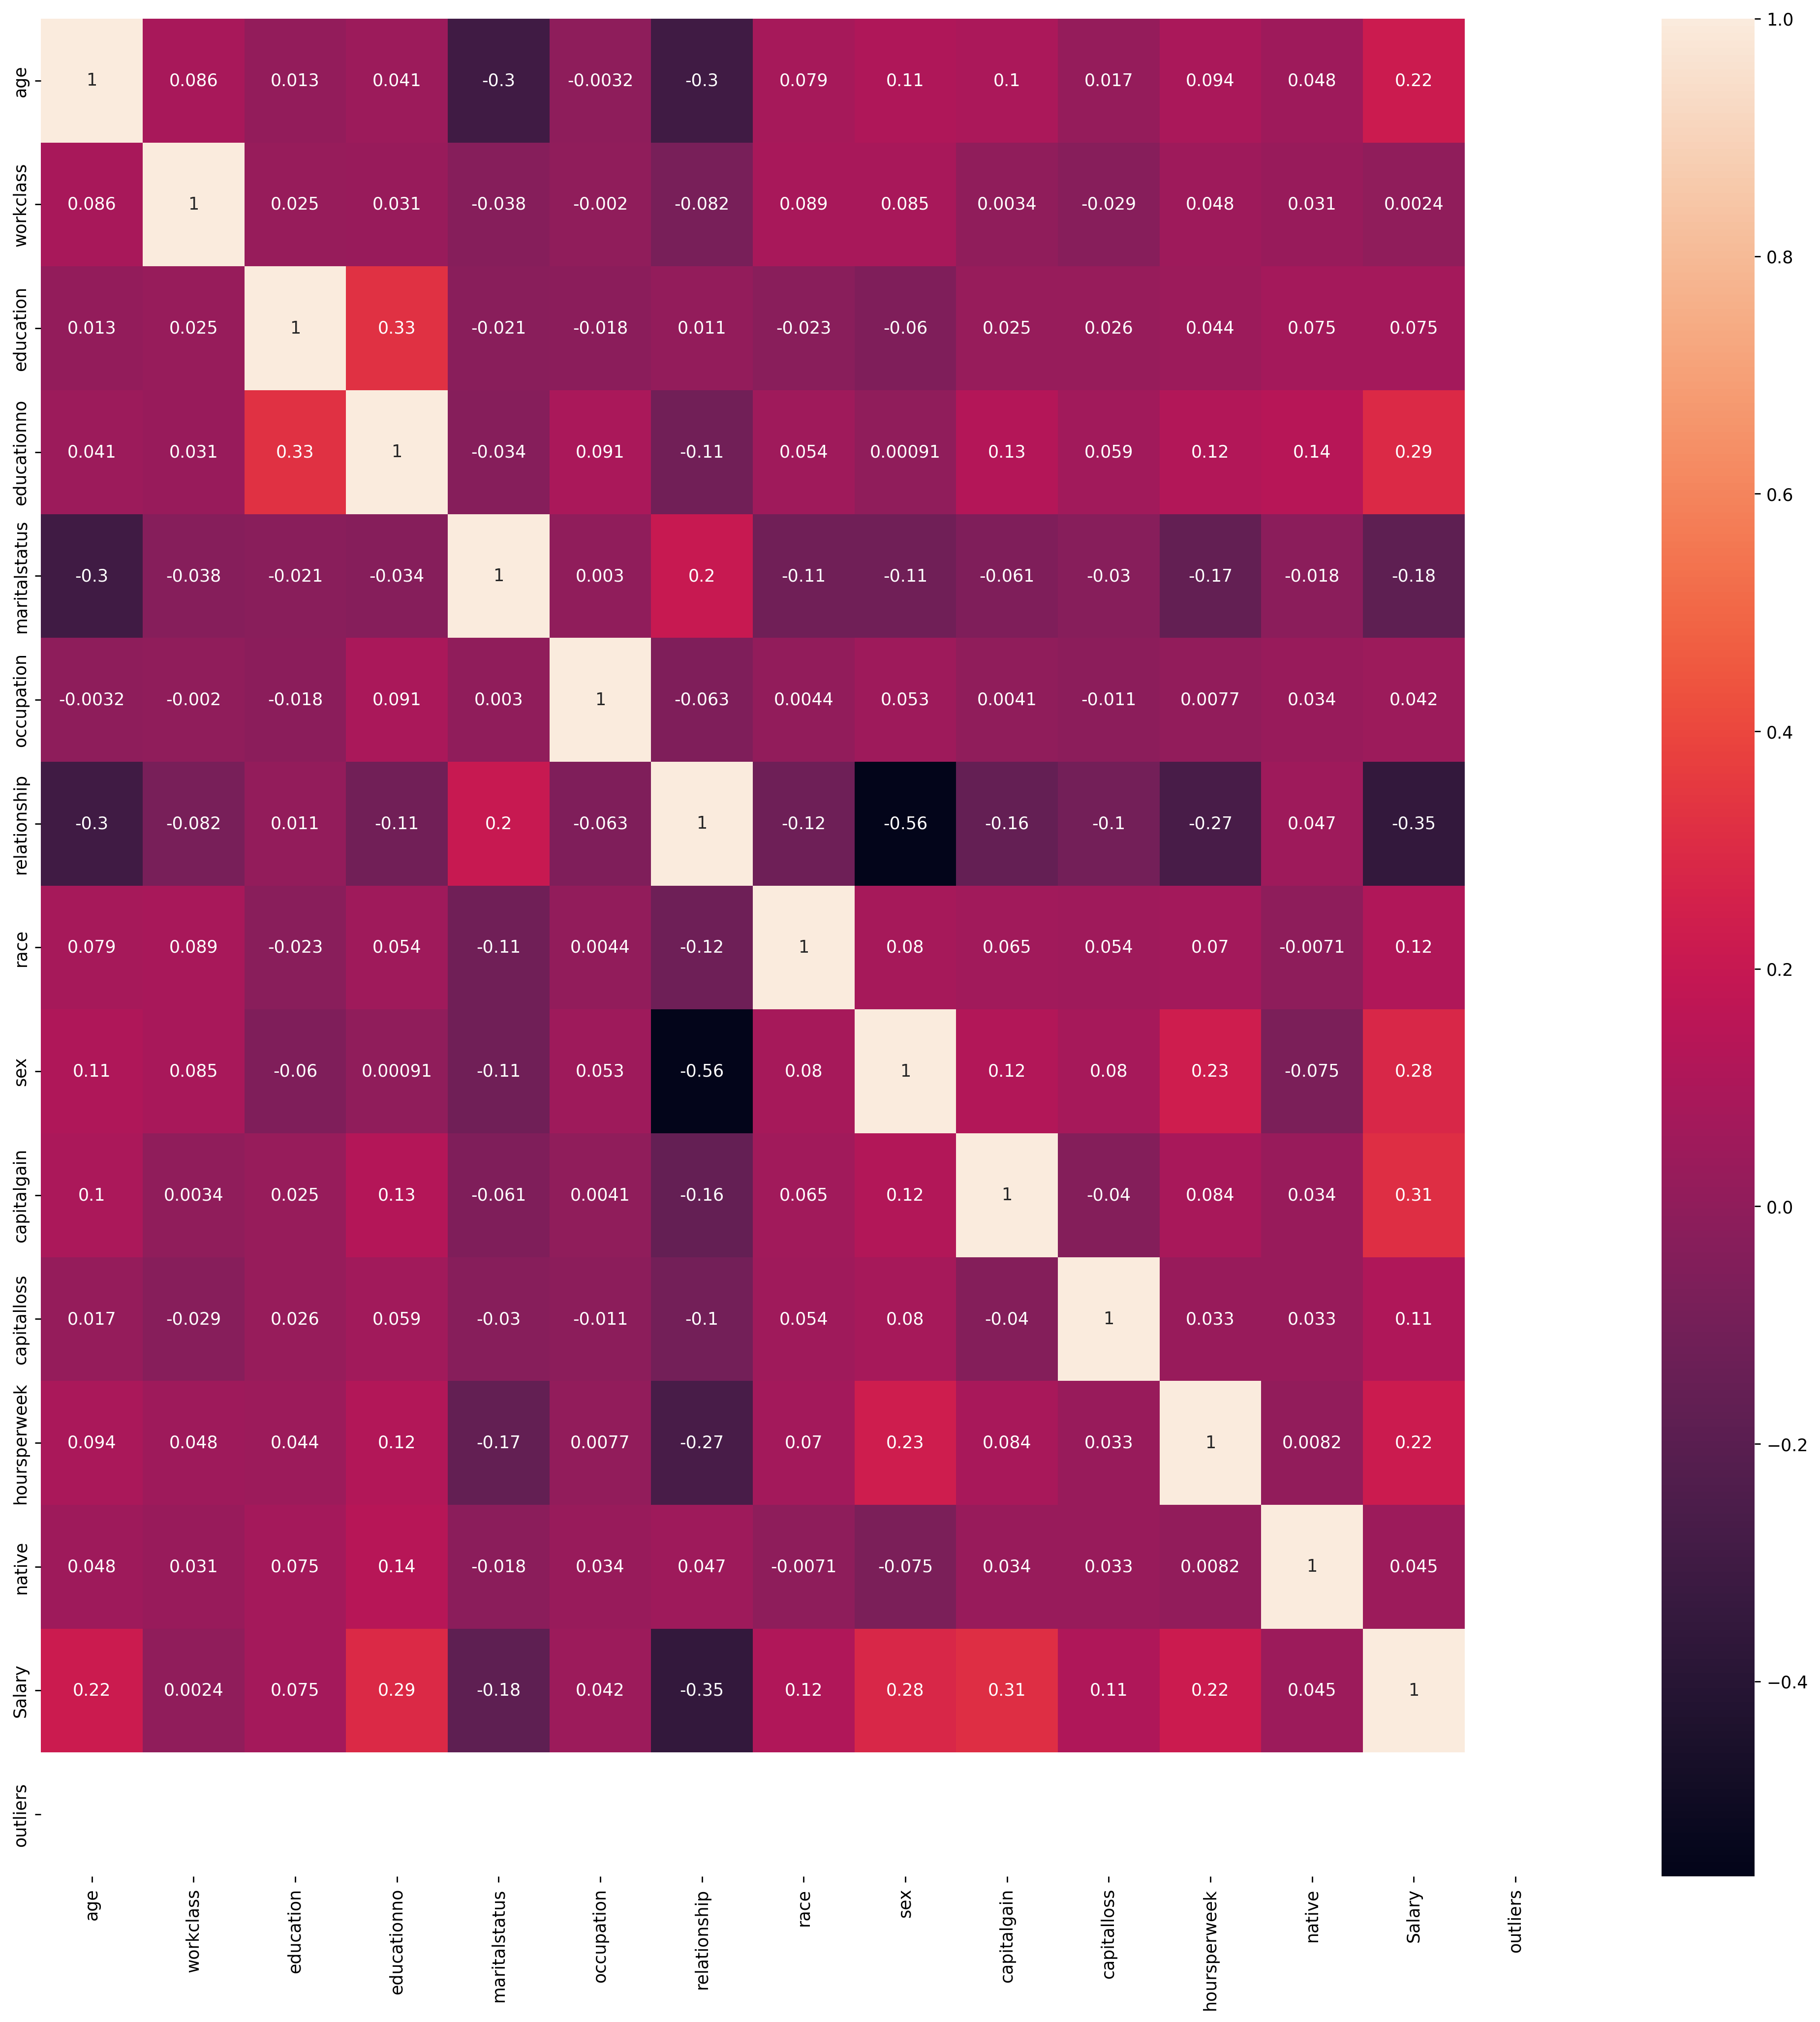

In [55]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250
sns.heatmap(df.corr(),annot=True)

In [16]:
df[df.corr()>80].sum() # No High Correlation Found between Features

age              0.0
workclass          0
education          0
educationno      0.0
maritalstatus      0
occupation         0
relationship       0
race               0
sex                0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
native             0
Salary             0
dtype: object

In [17]:
#Checking CoRelation using Spearman Rank 
df.corr(method ='spearman')

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.059573,0.112120,0.051131,0.118723
educationno,0.059573,1.000000,0.121971,0.077776,0.157801
capitalgain,0.112120,0.121971,1.000000,-0.077577,0.090102
capitalloss,0.051131,0.077776,-0.077577,1.000000,0.057019
hoursperweek,0.118723,0.157801,0.090102,0.057019,1.000000


<AxesSubplot:>

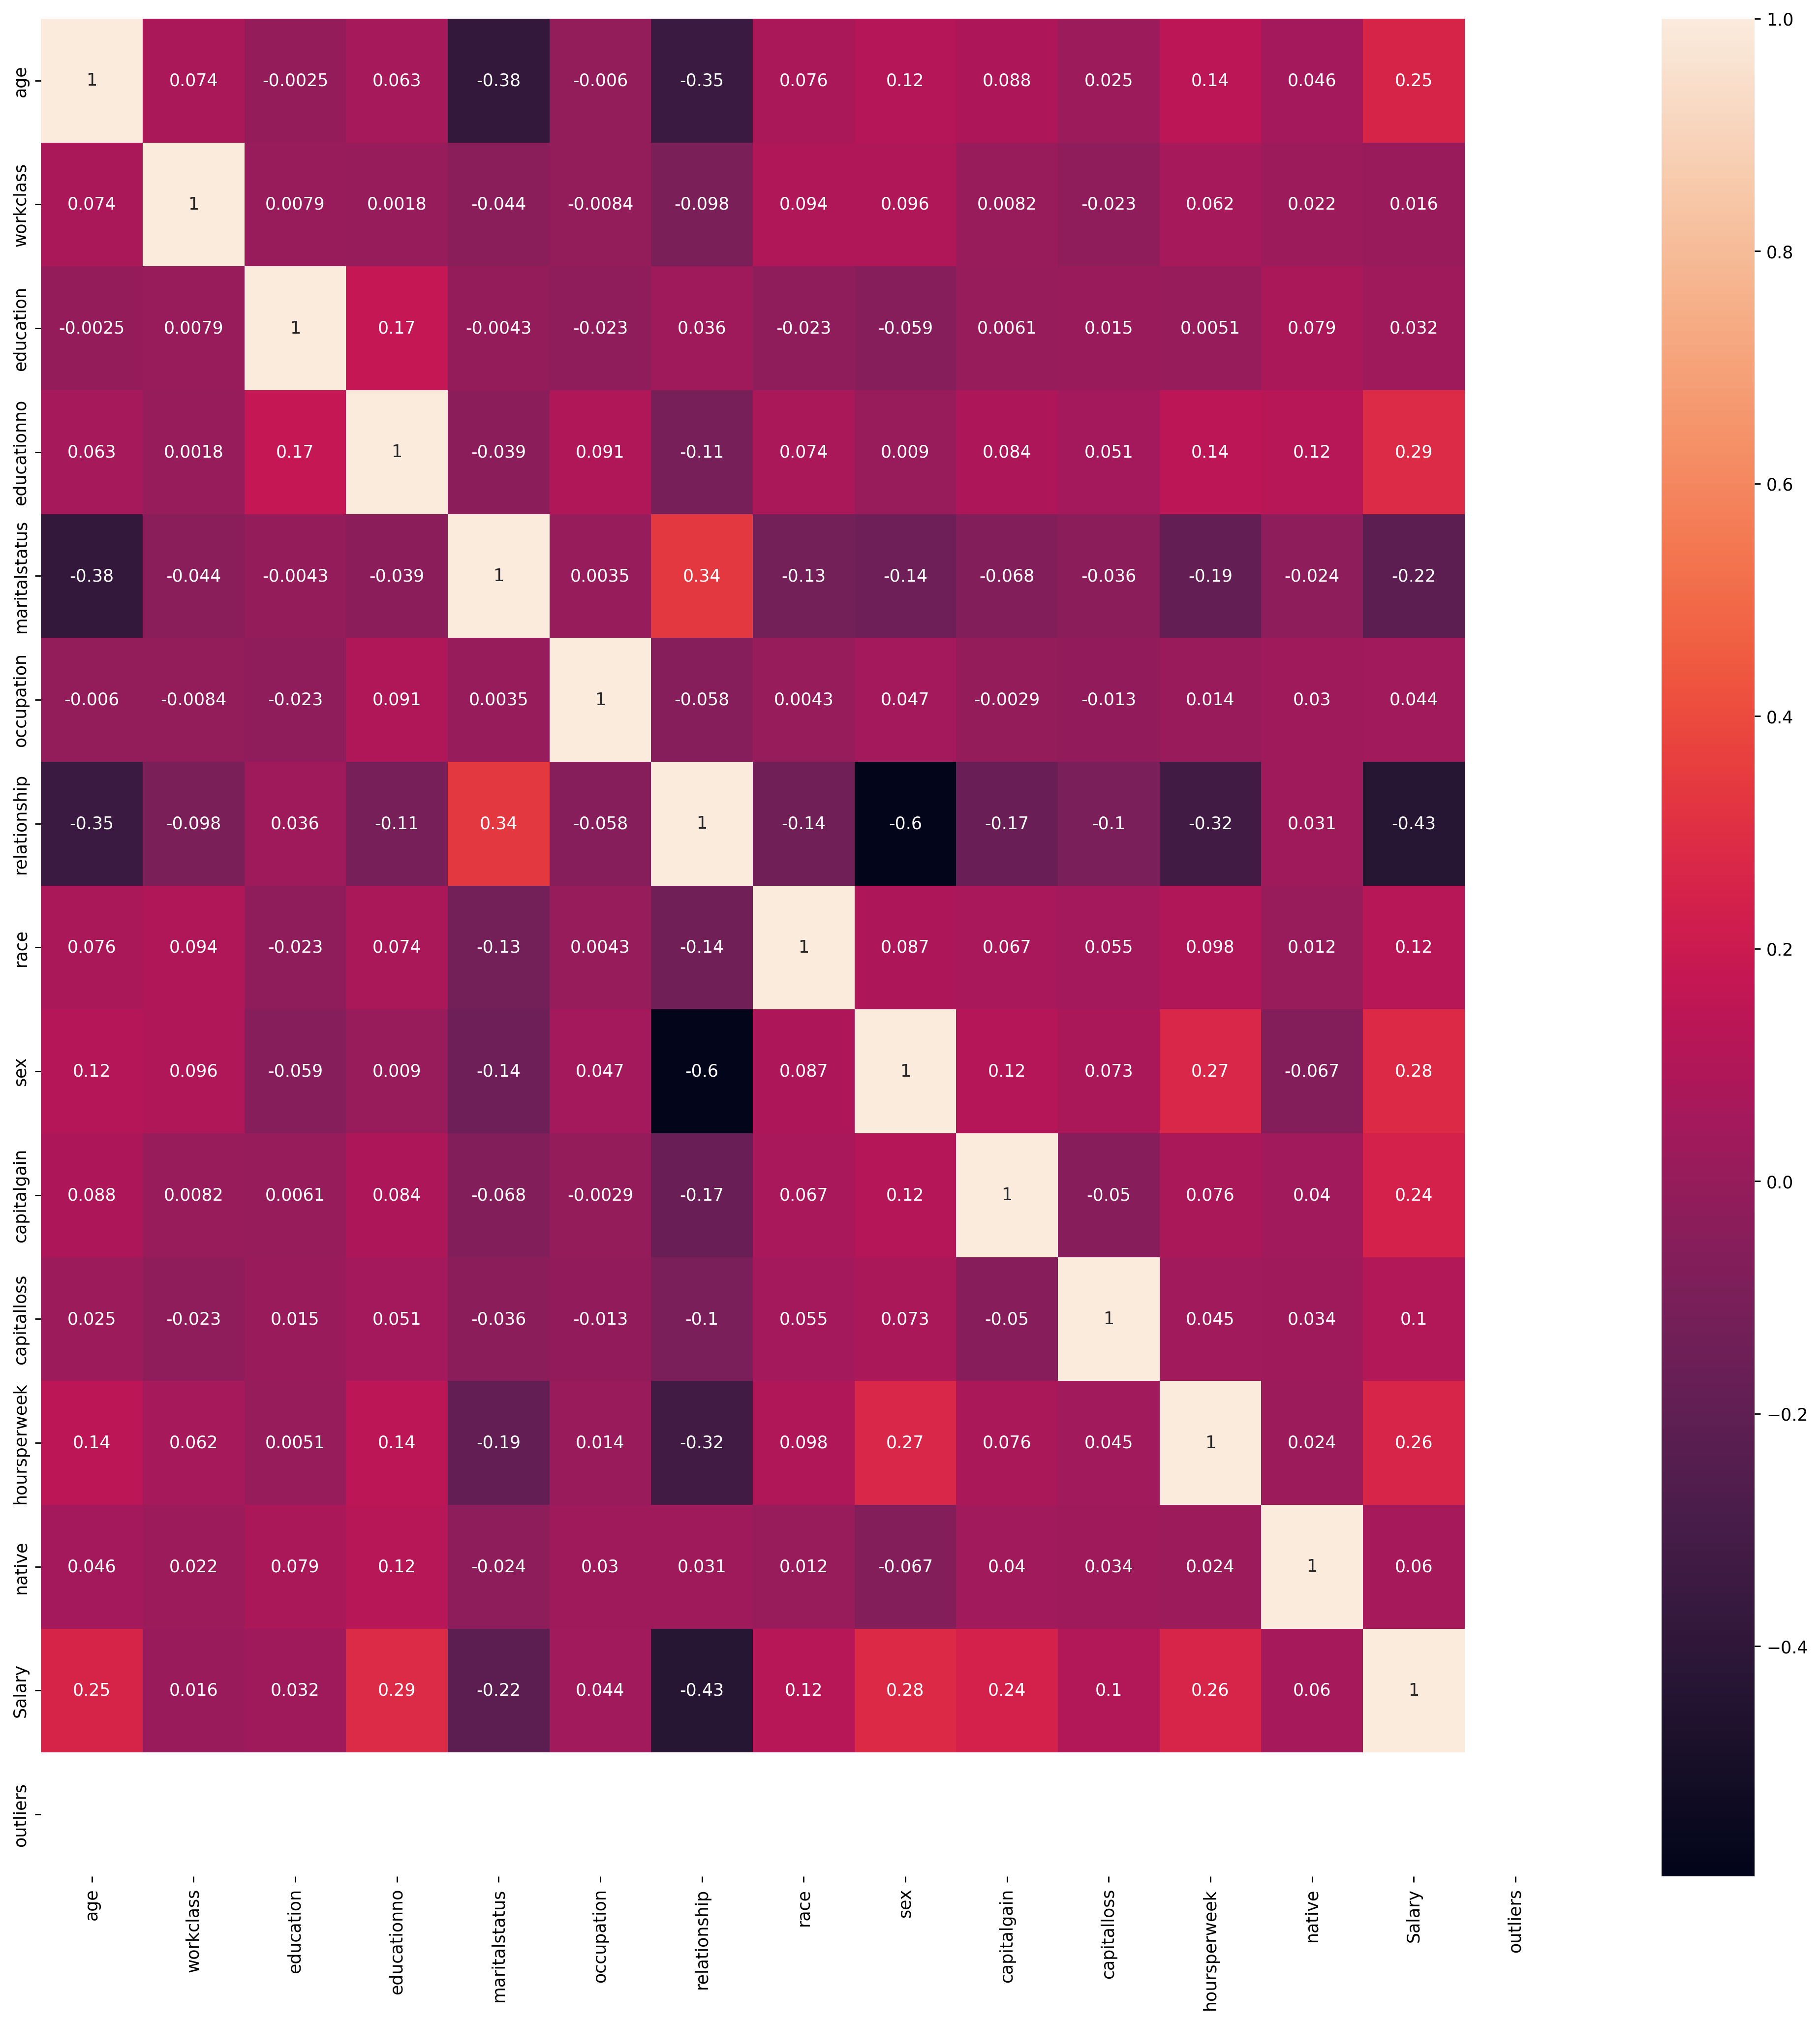

In [56]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250
sns.heatmap(df.corr(method ='spearman'),annot=True)

In [18]:
df[df.corr()>80].sum() # No High correation Found

age              0.0
workclass          0
education          0
educationno      0.0
maritalstatus      0
occupation         0
relationship       0
race               0
sex                0
capitalgain      0.0
capitalloss      0.0
hoursperweek     0.0
native             0
Salary             0
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39239 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            39239 non-null  int64 
 1   workclass      39239 non-null  object
 2   education      39239 non-null  object
 3   educationno    39239 non-null  int64 
 4   maritalstatus  39239 non-null  object
 5   occupation     39239 non-null  object
 6   relationship   39239 non-null  object
 7   race           39239 non-null  object
 8   sex            39239 non-null  object
 9   capitalgain    39239 non-null  int64 
 10  capitalloss    39239 non-null  int64 
 11  hoursperweek   39239 non-null  int64 
 12  native         39239 non-null  object
 13  Salary         39239 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.5+ MB


In [20]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000
mean,39.309412,10.136293,1253.346186,101.207727,41.206121
std,13.298159,2.637228,7994.096625,431.309171,12.458178
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [21]:
df.select_dtypes(object).columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [22]:
df["Salary"].value_counts()

 <=50K    29264
 >50K      9975
Name: Salary, dtype: int64

In [23]:
df["workclass"].value_counts()

 Private             27716
 Self-emp-not-inc     3669
 Local-gov            2975
 State-gov            1892
 Self-emp-inc         1595
 Federal-gov          1371
 Without-pay            21
Name: workclass, dtype: int64

In [24]:
df["education"].value_counts()

 HS-grad         12003
 Some-college     8456
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: education, dtype: int64

In [25]:
df["maritalstatus"].value_counts()

 Married-civ-spouse       17947
 Never-married            12168
 Divorced                  5885
 Separated                 1394
 Widowed                   1261
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64

In [26]:
df["occupation"].value_counts()

 Prof-specialty       5516
 Exec-managerial      5311
 Adm-clerical         4742
 Sales                4671
 Craft-repair         4634
 Other-service        4252
 Machine-op-inspct    2439
 Transport-moving     2032
 Handlers-cleaners    1712
 Farming-fishing      1424
 Tech-support         1325
 Protective-serv       937
 Priv-house-serv       230
 Armed-Forces           14
Name: occupation, dtype: int64

In [27]:
df["relationship"].value_counts()

 Husband           15645
 Not-in-family     10530
 Own-child          5194
 Unmarried          4547
 Wife               2004
 Other-relative     1319
Name: relationship, dtype: int64

In [28]:
df["race"].value_counts()

 White                 33063
 Black                  4089
 Asian-Pac-Islander     1299
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

In [29]:
df["sex"].value_counts()

 Male      26097
 Female    13142
Name: sex, dtype: int64

In [30]:
df["native"].value_counts()

 United-States                 35340
 Mexico                          879
 Philippines                     281
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 El-Salvador                     147
 India                           147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         102
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        84
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

In [31]:
df.select_dtypes(object).columns

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["Salary"]=le.fit_transform(df["Salary"])
df["workclass"]=le.fit_transform(df["workclass"])
df["education"]=le.fit_transform(df["education"])
df["maritalstatus"]=le.fit_transform(df["maritalstatus"])
df["occupation"]=le.fit_transform(df["occupation"])
df["relationship"]=le.fit_transform(df["relationship"])
df["race"]=le.fit_transform(df["race"])
df["sex"]=le.fit_transform(df["sex"])
df["native"]=le.fit_transform(df["native"])


In [33]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [34]:
from sklearn.ensemble import IsolationForest
iso=IsolationForest(random_state=10,contamination="auto")
out=iso.fit_predict(df)
out

array([ 1,  1,  1, ...,  1, -1,  1])

In [35]:
df["outliers"]=out
df["outliers"].value_counts()


 1    32557
-1     6682
Name: outliers, dtype: int64

In [43]:
# Dropping The ouliers
df=df[df["outliers"]== 1]
df


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,outliers
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0,1
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0,1
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0,1
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0,1
5,37,2,12,14,2,3,5,4,0,0,0,40,37,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45212,61,2,11,9,2,11,0,4,1,0,0,48,37,0,1
45215,48,1,12,14,0,7,1,4,1,0,0,40,37,0,1
45216,33,2,9,13,4,9,3,4,1,0,0,40,37,0,1
45217,39,2,9,13,0,9,1,4,0,0,0,36,37,0,1


In [44]:
x=df.iloc[:,:-2]
y=df.iloc[:,-2]

In [45]:
y

0        0
1        0
2        0
3        0
5        0
        ..
45212    0
45215    0
45216    0
45217    0
45220    1
Name: Salary, Length: 32557, dtype: int32

In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((22789, 13), (9768, 13), (22789,), (9768,))

In [47]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [48]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [49]:
clf = SVC()
clf.fit(xtrain , ytrain)
y_pred = clf.predict(xtest)

In [50]:
acc = accuracy_score(ytest, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(ytest, y_pred)

Accuracy = 84.7972972972973


array([[7249,  332],
       [1153, 1034]], dtype=int64)